# Max Image score type

In [1]:
import torch.utils.data as data
import cv2
import numpy as np
import matplotlib.pyplot as plt
from data_loader import get_loader
from matchmap_visualize import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [63]:
model = 'models/50epochs_avg_both_npairs.tar'
image_model, caption_model = load_model(model_path = model)
image_model.eval()
caption_model.eval()

Loaded checkpoint 'models/50epochs_avg_both_npairs.tar' (epoch 50)


LSTMBranch(
  (lstm): LSTM(300, 1024)
)

# Flickr30K

In [64]:
batch_size = 40
image_tensor_f, caption_glove_tensor_f, caption_list_f = get_data(batch_size, dataset = 'flickr30k')

In [65]:
mmap_f = gen_matchmap(image_model, caption_model, image_tensor_f, caption_glove_tensor_f)

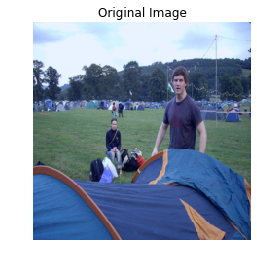

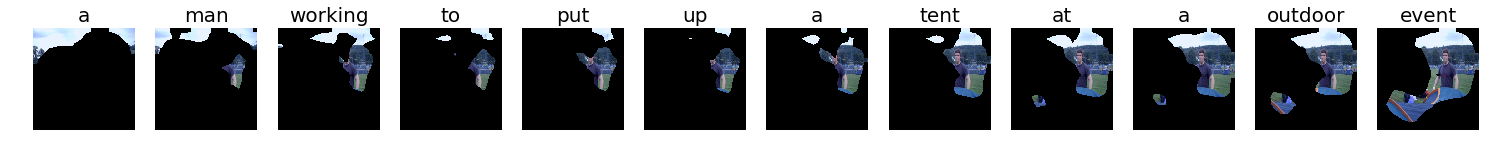

In [74]:
index_f = 15
name_f = str(index_f)


color_img_f, bw_img_f, mask_list_f, caption_f = gen_masks(mmap_f, image_tensor_f, 
                                                 caption_list_f, index_f)
gen_results(color_img_f, bw_img_f, mask_list_f, caption_f, name = name_f, save_flag=False, viz_map="seg", threshold = 0.3)

# MSCOCO

In [71]:
batch_size = 40

image_tensor, caption_glove_tensor, caption_list = get_data(batch_size, dataset = 'mscoco')

Vocabulary successfully loaded from vocab.pkl file!
loading annotations into memory...
Done (t=0.36s)
creating index...
index created!
Obtaining caption lengths...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 202654/202654 [00:20<00:00, 9695.83it/s]


In [72]:
mmap_mscoco = gen_matchmap(image_model, caption_model, image_tensor, caption_glove_tensor)

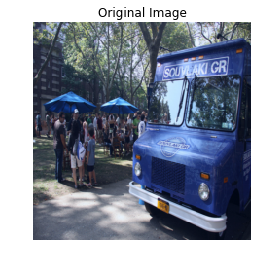

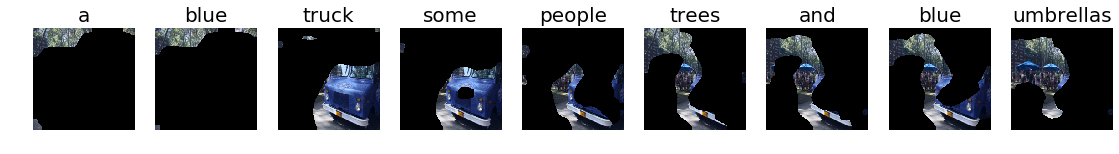

In [78]:
index = 40
name = str(index)


color_img, bw_img, mask_list, caption = gen_masks(mmap_mscoco, image_tensor, 
                                                 caption_list, index)
gen_results(color_img, bw_img, mask_list, caption, name = name, save_flag=False, viz_map="seg", threshold = 0.3)